In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\IntelliPaat\EDA CSV files\HR Employee Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.isnull().sum().sum()

0

In [6]:
# we will drop the following columns- 'EmployeeCount', 'EmployeeNumber', 'Over18' since they do not contribute much information

In [7]:
col_list=['EmployeeCount', 'EmployeeNumber','Over18','StandardHours']
data=df.drop(columns=col_list)
data.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7


In [8]:
y=data['Attrition']
data=data.drop(columns=['Attrition'])
data.head(2)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26192\2009766432.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True, fmt='.1g')


<Axes: >

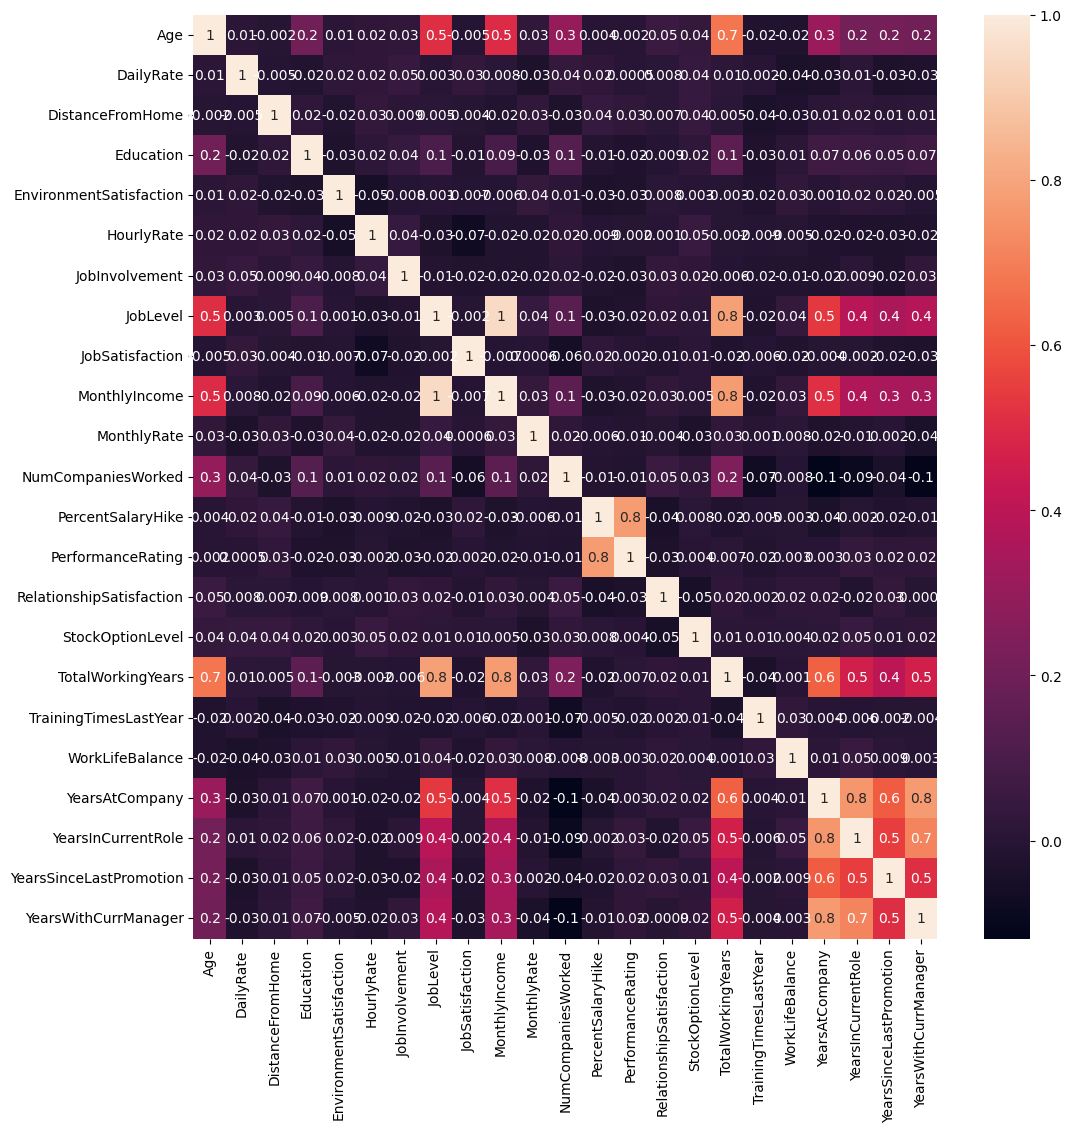

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True, fmt='.1g')

In [10]:
lx=data.corr()
lx[(lx>0.2) | (lx<-0.2)]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26192\3027728276.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lx=data.corr()


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,NaN,NaN,0.208034,NaN,NaN,NaN,0.509604,NaN,0.497855,NaN,0.299635,NaN,NaN,NaN,NaN,0.680381,NaN,NaN,0.311309,0.212901,0.216513,0.202089
DailyRate,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,0.208034,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnvironmentSatisfaction,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HourlyRate,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JobInvolvement,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JobLevel,0.509604,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.950300,NaN,NaN,NaN,NaN,NaN,NaN,0.782208,NaN,NaN,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthlyIncome,0.497855,NaN,NaN,NaN,NaN,NaN,NaN,0.950300,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.772893,NaN,NaN,0.514285,0.363818,0.344978,0.344079


In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.columns:
    data[i]=le.fit_transform(data[i])

data

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,2,624,2,0,1,1,1,0,64,2,1,7,3,2,809,999,8,1,0,0,0,0,8,0,0,6,4,0,5
1,31,1,113,1,7,0,1,2,1,31,1,1,6,1,1,682,1328,1,0,12,1,3,1,10,3,2,10,7,1,7
2,19,2,805,1,1,1,4,3,1,62,1,0,2,2,2,62,18,6,1,4,0,1,0,7,3,2,0,0,0,0
3,15,1,820,1,2,3,1,3,0,26,2,0,6,2,1,313,1228,1,1,0,0,2,0,8,3,2,8,7,3,0
4,9,2,312,1,1,0,3,0,1,10,2,0,2,1,1,399,846,9,0,1,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,1,494,1,22,1,3,2,1,11,3,1,2,3,1,210,599,4,0,6,0,2,1,17,3,2,5,2,0,3
1466,21,2,327,1,5,0,3,3,1,12,1,2,0,0,1,1070,1123,4,0,4,0,0,1,9,5,2,7,7,1,7
1467,9,2,39,1,3,2,1,1,1,57,3,1,4,1,1,821,175,1,1,9,1,1,1,6,0,2,6,2,0,3
1468,31,1,579,2,1,2,3,3,1,33,1,1,7,1,1,730,641,2,0,3,0,3,0,17,3,1,9,6,0,8


In [12]:
y=le.fit_transform(y)
y

array([1, 0, 1, ..., 0, 0, 0])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   BusinessTravel            1470 non-null   int32
 2   DailyRate                 1470 non-null   int64
 3   Department                1470 non-null   int32
 4   DistanceFromHome          1470 non-null   int64
 5   Education                 1470 non-null   int64
 6   EducationField            1470 non-null   int32
 7   EnvironmentSatisfaction   1470 non-null   int64
 8   Gender                    1470 non-null   int32
 9   HourlyRate                1470 non-null   int64
 10  JobInvolvement            1470 non-null   int64
 11  JobLevel                  1470 non-null   int64
 12  JobRole                   1470 non-null   int32
 13  JobSatisfaction           1470 non-null   int64
 14  MaritalStatus             1470 non-null 

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()

In [15]:
vif_data['features']=data.columns
vif_data['vif_value']=[variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
vif_data

,features,vif_value
0,Age,10.665946
1,BusinessTravel,6.392891
2,DailyRate,3.989722
3,Department,13.025917
4,DistanceFromHome,2.024150
5,Education,4.681567
6,EducationField,3.784965
7,EnvironmentSatisfaction,3.424063
8,Gender,2.439360
9,HourlyRate,4.038826


In [16]:
data=data.drop(columns=['MonthlyIncome'])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   BusinessTravel            1470 non-null   int32
 2   DailyRate                 1470 non-null   int64
 3   Department                1470 non-null   int32
 4   DistanceFromHome          1470 non-null   int64
 5   Education                 1470 non-null   int64
 6   EducationField            1470 non-null   int32
 7   EnvironmentSatisfaction   1470 non-null   int64
 8   Gender                    1470 non-null   int32
 9   HourlyRate                1470 non-null   int64
 10  JobInvolvement            1470 non-null   int64
 11  JobLevel                  1470 non-null   int64
 12  JobRole                   1470 non-null   int32
 13  JobSatisfaction           1470 non-null   int64
 14  MaritalStatus             1470 non-null 

In [18]:
vif_data=pd.DataFrame()
vif_data['features']=data.columns
vif_data['vif_value']=[variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
vif_data

,features,vif_value
0,Age,10.637689
1,BusinessTravel,6.360245
2,DailyRate,3.979277
3,Department,12.459292
4,DistanceFromHome,2.023021
5,Education,4.647033
6,EducationField,3.783216
7,EnvironmentSatisfaction,3.423270
8,Gender,2.437607
9,HourlyRate,4.032967


In [19]:
data=data.drop(columns=['TotalWorkingYears'])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   BusinessTravel            1470 non-null   int32
 2   DailyRate                 1470 non-null   int64
 3   Department                1470 non-null   int32
 4   DistanceFromHome          1470 non-null   int64
 5   Education                 1470 non-null   int64
 6   EducationField            1470 non-null   int32
 7   EnvironmentSatisfaction   1470 non-null   int64
 8   Gender                    1470 non-null   int32
 9   HourlyRate                1470 non-null   int64
 10  JobInvolvement            1470 non-null   int64
 11  JobLevel                  1470 non-null   int64
 12  JobRole                   1470 non-null   int32
 13  JobSatisfaction           1470 non-null   int64
 14  MaritalStatus             1470 non-null 

In [21]:
vif_data=pd.DataFrame()
vif_data['features']=data.columns
vif_data['vif_value']=[variance_inflation_factor(data.values,i) for i in range (len(data.columns))]
vif_data

,features,vif_value
0,Age,7.974564
1,BusinessTravel,6.348827
2,DailyRate,3.973066
3,Department,12.372780
4,DistanceFromHome,2.022861
5,Education,4.646893
6,EducationField,3.780067
7,EnvironmentSatisfaction,3.421636
8,Gender,2.437490
9,HourlyRate,4.032453


In [22]:
data=data.drop(columns=['Department'])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   BusinessTravel            1470 non-null   int32
 2   DailyRate                 1470 non-null   int64
 3   DistanceFromHome          1470 non-null   int64
 4   Education                 1470 non-null   int64
 5   EducationField            1470 non-null   int32
 6   EnvironmentSatisfaction   1470 non-null   int64
 7   Gender                    1470 non-null   int32
 8   HourlyRate                1470 non-null   int64
 9   JobInvolvement            1470 non-null   int64
 10  JobLevel                  1470 non-null   int64
 11  JobRole                   1470 non-null   int32
 12  JobSatisfaction           1470 non-null   int64
 13  MaritalStatus             1470 non-null   int32
 14  MonthlyRate               1470 non-null 

In [24]:
vif_data=pd.DataFrame()
vif_data['features']=data.columns
vif_data['vif_value']=[variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
vif_data

,features,vif_value
0,Age,7.973768
1,BusinessTravel,6.343351
2,DailyRate,3.961300
3,DistanceFromHome,2.019546
4,Education,4.644927
5,EducationField,3.773551
6,EnvironmentSatisfaction,3.420304
7,Gender,2.435937
8,HourlyRate,4.019907
9,JobInvolvement,6.559697


In [25]:
data=data.drop(columns=['YearsAtCompany'])

In [26]:
vif_data=pd.DataFrame()
vif_data['features']=data.columns
vif_data['vif_value']=[variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
vif_data

,features,vif_value
0,Age,7.889030
1,BusinessTravel,6.340236
2,DailyRate,3.958999
3,DistanceFromHome,2.019519
4,Education,4.644897
5,EducationField,3.773367
6,EnvironmentSatisfaction,3.420303
7,Gender,2.434942
8,HourlyRate,4.015940
9,JobInvolvement,6.550305


In [27]:
data=data.drop(columns=['Age'])

In [28]:
vif_data=pd.DataFrame()
vif_data['features']=data.columns
vif_data['vif_value']=[variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
vif_data

,features,vif_value
0,BusinessTravel,6.308346
1,DailyRate,3.955008
2,DistanceFromHome,2.019181
3,Education,4.471276
4,EducationField,3.771988
5,EnvironmentSatisfaction,3.413894
6,Gender,2.433625
7,HourlyRate,3.993244
8,JobInvolvement,6.512634
9,JobLevel,2.536774


In [29]:
data=data.drop(columns=['WorkLifeBalance'])

In [30]:
vif_data=pd.DataFrame()
vif_data['features']=data.columns
vif_data['vif_value']=[variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
vif_data

,features,vif_value
0,BusinessTravel,6.271088
1,DailyRate,3.953281
2,DistanceFromHome,2.019133
3,Education,4.448986
4,EducationField,3.732274
5,EnvironmentSatisfaction,3.388813
6,Gender,2.423046
7,HourlyRate,3.975596
8,JobInvolvement,6.479890
9,JobLevel,2.529177


In [31]:
data=data.drop(columns=['JobInvolvement'])

In [32]:
vif_data=pd.DataFrame()
vif_data['features']=data.columns
vif_data['vif_value']=[variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
vif_data

,features,vif_value
0,BusinessTravel,6.153073
1,DailyRate,3.907656
2,DistanceFromHome,2.015877
3,Education,4.400083
4,EducationField,3.719556
5,EnvironmentSatisfaction,3.379004
6,Gender,2.406215
7,HourlyRate,3.930368
8,JobLevel,2.529026
9,JobRole,4.114228


In [33]:
data=data.drop(columns=['BusinessTravel'])

In [34]:
vif_data=pd.DataFrame()
vif_data['features']=data.columns
vif_data['vif_value']=[variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
vif_data

,features,vif_value
0,DailyRate,3.885110
1,DistanceFromHome,2.015270
2,Education,4.371838
3,EducationField,3.680159
4,EnvironmentSatisfaction,3.358058
5,Gender,2.399265
6,HourlyRate,3.876115
7,JobLevel,2.520941
8,JobRole,4.081899
9,JobSatisfaction,3.341617


In [35]:
data=data.drop(columns=['PercentSalaryHike'])

In [36]:
vif_data=pd.DataFrame()
vif_data['features']=data.columns
vif_data['vif_value']=[variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
vif_data

,features,vif_value
0,DailyRate,3.861802
1,DistanceFromHome,2.009929
2,Education,4.357573
3,EducationField,3.677308
4,EnvironmentSatisfaction,3.355793
5,Gender,2.389852
6,HourlyRate,3.872485
7,JobLevel,2.520667
8,JobRole,4.062290
9,JobSatisfaction,3.328787


In [37]:
data=data.drop(columns=['YearsInCurrentRole'])

In [38]:
vif_data=pd.DataFrame()
vif_data['features']=data.columns
vif_data['vif_value']=[variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
vif_data

,features,vif_value
0,DailyRate,3.846465
1,DistanceFromHome,2.009463
2,Education,4.355906
3,EducationField,3.677230
4,EnvironmentSatisfaction,3.350317
5,Gender,2.389521
6,HourlyRate,3.872152
7,JobLevel,2.468334
8,JobRole,4.057232
9,JobSatisfaction,3.324791


In [39]:
data=data.drop(columns=['TrainingTimesLastYear'])

In [40]:
vif_data=pd.DataFrame()
vif_data['features']=data.columns
vif_data['vif_value']=[variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
vif_data

,features,vif_value
0,DailyRate,3.810360
1,DistanceFromHome,2.009435
2,Education,4.332200
3,EducationField,3.604434
4,EnvironmentSatisfaction,3.336629
5,Gender,2.385644
6,HourlyRate,3.839757
7,JobLevel,2.466267
8,JobRole,4.021159
9,JobSatisfaction,3.304677


In [41]:
data.sample(4)

,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,YearsSinceLastPromotion,YearsWithCurrManager
1180,135,6,2,1,0,1,47,0,2,1,2,524,2,0,0,2,0,1,3
643,730,2,2,1,2,0,65,1,2,3,1,1264,2,1,0,1,1,1,3
563,493,25,0,3,2,0,2,1,7,3,2,1205,1,0,1,1,0,1,4
660,433,1,0,1,3,1,27,0,2,3,0,652,9,1,0,3,1,0,0


In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data=sc.fit_transform(data)

In [43]:
data=pd.DataFrame(data)

In [44]:
data.sample(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
645,-1.140663,-1.010909,0.085049,0.565311,-0.660531,-1.224745,-0.880361,-0.961486,1.439057,0.246200,-1.503385,1.325645,1.324226,1.591746,-0.42623,0.266233,2.589994,-0.679146,-0.595227
963,0.512673,-0.887515,-0.891688,-0.937414,-0.660531,-1.224745,-1.716872,-0.057788,1.032716,-1.567907,-1.503385,0.701385,0.122861,-0.628241,-0.42623,1.191438,0.241988,-0.368715,0.806541
62,0.465322,-0.270544,-0.891688,0.565311,-0.660531,-1.224745,-1.126394,2.653309,0.220033,0.246200,-1.503385,0.339459,0.923771,1.591746,-0.42623,1.191438,0.241988,3.356449,1.086895
1113,0.954615,-1.010909,1.061787,2.068035,1.169781,0.816497,-0.191470,-0.057788,0.626374,-1.567907,-0.133282,1.527255,0.523316,-0.628241,-0.42623,-0.658973,0.241988,-0.368715,-0.595227


In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test=train_test_split(data,y,test_size=0.2, random_state=42, stratify=y)

In [48]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
y_pred=rfc.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [51]:
confusion_matrix(y_test, y_pred)

array([[246,   1],
       [ 40,   7]], dtype=int64)

In [52]:
accuracy_score(y_test, y_pred)

0.8605442176870748

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       247
           1       0.88      0.15      0.25        47

    accuracy                           0.86       294
   macro avg       0.87      0.57      0.59       294
weighted avg       0.86      0.86      0.82       294



In [54]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Dense

In [66]:
attrition_model=models.Sequential()

In [67]:
attrition_model.add(layers.Dense(50,activation='relu',input_shape=(19,))),
attrition_model.add(layers.Dense(25, activation='relu')),
attrition_model.add(layers.Dense(1, activation='sigmoid'))

In [68]:
attrition_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [69]:
attrition_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                1000      
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 2301 (8.99 KB)
Trainable params: 2301 (8.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
attrition_model.fit(X_train, y_train,batch_size=50, epochs=50, verbose=True, validation_split=0.2)

Epoch 1/50
19/19 [==============================] - 5s 50ms/step - loss: 0.5878 - accuracy: 0.7426 - val_loss: 0.4982 - val_accuracy: 0.8305
Epoch 2/50
19/19 [==============================] - 0s 12ms/step - loss: 0.4620 - accuracy: 0.8426 - val_loss: 0.4550 - val_accuracy: 0.8305
Epoch 3/50
19/19 [==============================] - 0s 12ms/step - loss: 0.4290 - accuracy: 0.8404 - val_loss: 0.4315 - val_accuracy: 0.8305
Epoch 4/50
19/19 [==============================] - 0s 12ms/step - loss: 0.4072 - accuracy: 0.8415 - val_loss: 0.4099 - val_accuracy: 0.8305
Epoch 5/50
19/19 [==============================] - 0s 13ms/step - loss: 0.3901 - accuracy: 0.8426 - val_loss: 0.3955 - val_accuracy: 0.8305
Epoch 6/50
19/19 [==============================] - 0s 13ms/step - loss: 0.3773 - accuracy: 0.8500 - val_loss: 0.3851 - val_accuracy: 0.8305
Epoch 7/50
19/19 [==============================] - 0s 12ms/step - loss: 0.3666 - accuracy: 0.8532 - val_loss: 0.3777 - val_accuracy: 0.8347
Epoch 8/50
19

In [71]:
attrition_model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 7ms/step - loss: 0.4463 - accuracy: 0.8333


[0.4462941586971283, 0.8333333134651184]

In [72]:
y_pred=attrition_model.predict(X_test)

10/10 [==============================] - 0s 4ms/step


In [73]:
y_pred_class=(y_pred>=0.5).astype(int).reshape(-1)

In [74]:
y_pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0])

In [75]:
confusion_matrix(y_test,y_pred_class)

array([[230,  17],
       [ 32,  15]], dtype=int64)

In [76]:
accuracy_score(y_test,y_pred_class)

0.8333333333333334